<a href="https://colab.research.google.com/github/aswanthoffl/Air-Quality-Regression-Project/blob/main/Air_Quality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This could be useful for:

Real-time air quality monitoring: Providing up-to-date information to citizens and authorities.
Air quality forecasting: Predicting future air quality trends based on historical data and current conditions.
Identifying pollution sources: Pinpointing the sources of pollution contributing to poor air quality.
Policymaking: Informing policy decisions to improve air quality and public health.

impact of Features on AQI

Each of the pollutant features has a significant impact on the AQI:

Particulate Matter (PM2.5, PM10): Higher concentrations of these fine particles contribute to poor air quality and can cause respiratory problems. Nitrogen Oxides (NO2, NOx): These pollutants contribute to smog formation and can irritate the respiratory system. Sulfur Dioxide (SO2): Can cause respiratory problems and acid rain. Carbon Monoxide (CO): A harmful gas that can reduce oxygen levels in the blood. Ozone (O3): A major component of smog, high levels of ozone can damage lung tissue. Volatile Organic Compounds (VOCs) like Benzene, Toluene, and Xylene: These pollutants contribute to smog formation and can have adverse health effects. Higher concentrations of these pollutants generally lead to a higher AQI. However, the specific impact of each pollutant on the AQI can vary depending on factors like meteorological conditions, local emissions sources, and the composition of the air pollution mixture.

Data Description
This dataset appears to be a single data point representing air quality measurements for a specific city on a particular date. The features included are:

City: The name of the city where the measurements were taken.
Date: The date of the measurement.
PM2.5, PM10, NO3, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene: These are different pollutants or air quality parameters, measured in various units (e.g., micrograms per cubic meter, parts per million).
AQI: The Air Quality Index, a composite index that represents the overall air quality based on the concentration of various pollutants.
AQI_Bucket: A categorical variable indicating the air quality category (e.g., good, moderate, poor, very poor).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df=pd.read_csv('/content/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.head(15)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [ ]:
df.tail(15)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29516,Visakhapatnam,2020-06-17,17.05,73.22,6.08,36.31,24.23,6.69,0.54,11.08,26.09,2.96,6.96,1.39,90.0,Satisfactory
29517,Visakhapatnam,2020-06-18,21.16,88.80,4.94,42.96,26.79,3.22,0.68,11.05,27.65,4.38,7.65,1.69,71.0,Satisfactory
29518,Visakhapatnam,2020-06-19,14.41,66.81,6.22,40.06,26.10,7.51,1.07,13.23,27.34,2.55,8.98,1.45,110.0,Moderate
29519,Visakhapatnam,2020-06-20,26.67,86.29,3.78,37.36,22.46,15.05,0.74,11.76,41.97,3.14,11.89,1.87,74.0,Satisfactory
29520,Visakhapatnam,2020-06-21,25.96,91.75,5.65,40.22,25.78,13.32,0.71,10.10,38.27,3.10,10.26,1.57,92.0,Satisfactory
29521,Visakhapatnam,2020-06-22,33.17,108.22,5.58,42.45,27.06,13.70,0.73,13.65,34.85,3.99,10.24,2.32,95.0,Satisfactory
29522,Visakhapatnam,2020-06-23,25.40,83.38,2.76,34.09,19.92,13.13,0.54,10.40,43.27,2.88,12.03,1.33,100.0,Satisfactory
29523,Visakhapatnam,2020-06-24,34.36,90.90,1.22,23.38,13.12,14.45,0.56,10.92,35.12,2.99,3.15,1.60,86.0,Satisfactory
29524,Visakhapatnam,2020-06-25,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38,1.28,5.64,0.92,77.0,Satisfactory
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


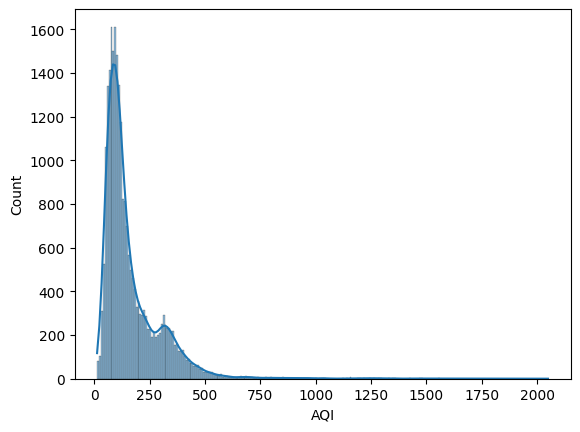

In [ ]:
sns.histplot(df['AQI'],kde=True)
plt.show()

In [ ]:
# sns.histplot(df['CO'], kde=True)
# plt.title('CO content')
# plt.show()

# # Bivariate analysis: Survival rate by 'sex'
# sns.barplot(x='CO', y='AQI', data=df)
# plt.title('Air quality rate by CO content')
# plt.legend()
# plt.show()

#DATA CLEANING

In [ ]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['NO'].fillna(df['NO'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].median(), inplace=True)
df['NH3'].fillna(df['NH3'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['Benzene'].fillna(df['Benzene'].median(), inplace=True)
df['Toluene'].fillna(df['Toluene'].median(), inplace=True)
df['Xylene'].fillna(df['Xylene'].median(), inplace=True)
df['AQI'].fillna(df['AQI'].median(), inplace=True)

<ipython-input-158-834b88b6f853>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
<ipython-input-158-834b88b6f853>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN


# LEABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df['City'] = labelencoder.fit_transform(df['City'])
df['AQI_Bucket'] = labelencoder.fit_transform(df['AQI_Bucket'])

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,6
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,6
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,6
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,6
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,3
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,3


# CORRELATION AND SIMPLIFYING

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
AQI_Bucket,0.204067


In [ ]:
df.drop(columns=['Benzene'],inplace=True)
df.drop(columns=['NH3'],inplace=True)
df.drop(columns=['Xylene'],inplace=True)
df.drop(columns=['NO'],inplace=True)
df.drop(columns=['O3'],inplace=True)
df.drop(columns=['Toluene'],inplace=True)
df.drop(columns=['AQI_Bucket'],inplace=True)
df.drop(columns=['City'],inplace=True)
#df.drop(columns=['NOx'],inplace=True)
#df.drop(columns=['PM10'],inplace=True)

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NOx,0.436282


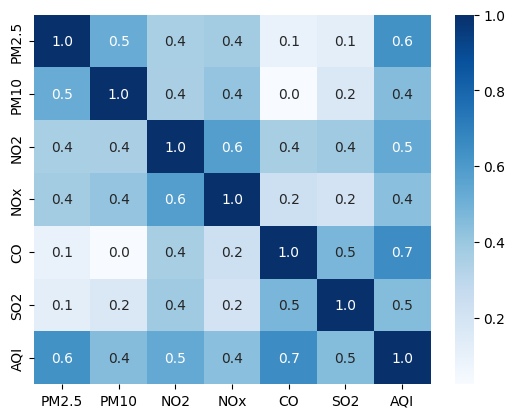

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

#OUTLIER DETECTION

In [ ]:
import numpy as np

In [ ]:
# # Plotting original data distribution
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# sns.histplot(df["PM10"], bins=30, kde=True)
# plt.title("Original Data (Right-Skewed)")

# # Applying log transformation
# log_data = np.log(df["PM10"] + 1)  # Adding 1 to avoid log(0)

# # Plotting log-transformed data distribution
# plt.subplot(1,2,2)
# sns.histplot(log_data, bins=30, kde=True)
# plt.title("Log-Transformed Data")
# plt.show()

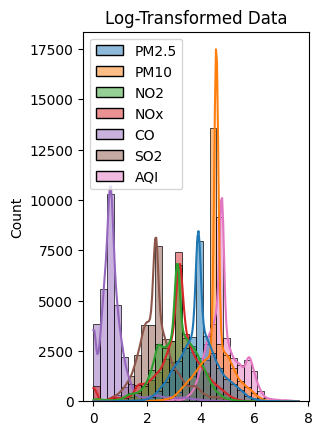

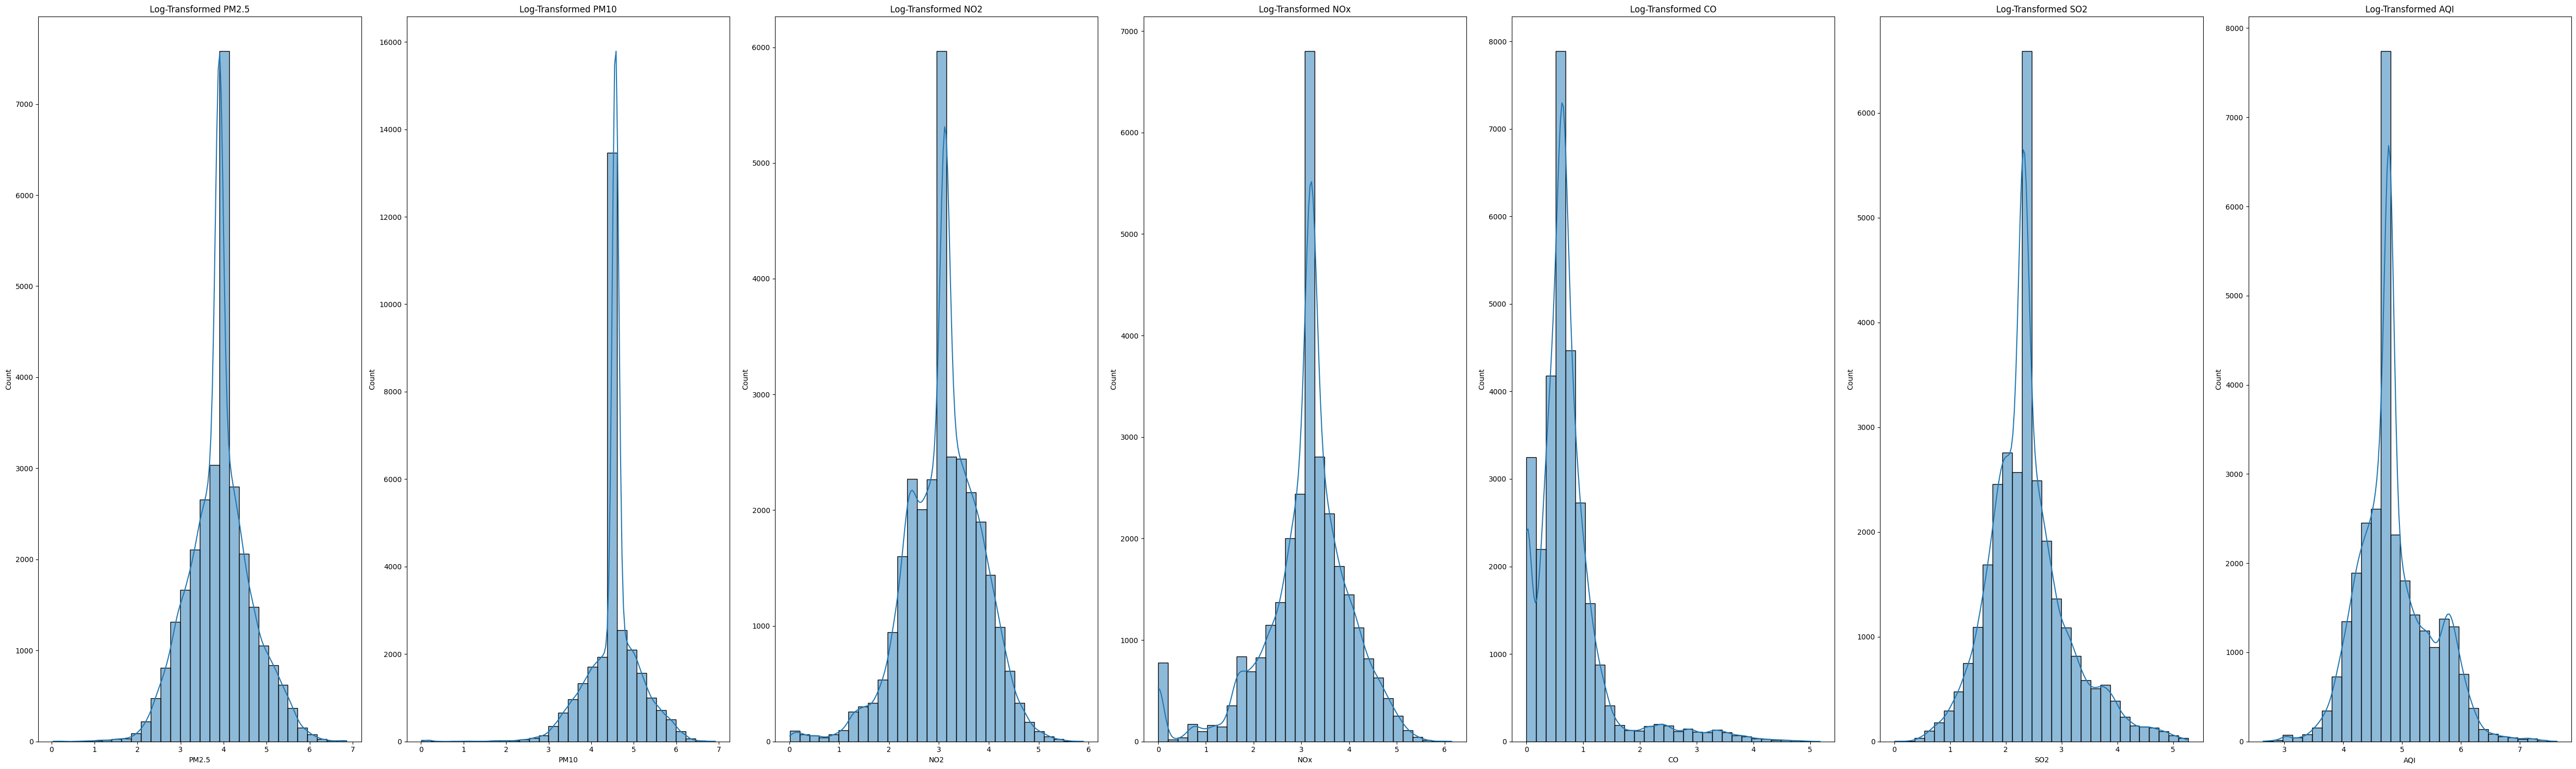

In [ ]:
#To handle skewness
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
# Q1=np.quantile(df,0.25)
# Q2=np.quantile(df,0.50)
# Q3=np.quantile(df,0.75)
# Q1,Q2,Q3
# IQR=Q3-Q1
# IQR


In [ ]:
# hh=df.columns.tolist()
# hh.remove('AQI')
# hh

In [ ]:
# def remove_outliers_iqr(log_data, column):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
#     Q1 = log_data[column].quantile(0.25)
#     Q3 = log_data[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for detecting outliers
#     lower_bound = Q1 - 1.5  * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out the outliers from the DataFrame
#     log_data_filtered = log_data[(log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)]
#     return log_data_filtered

# for i in hh:
#     log_data = remove_outliers_iqr(log_data, i)

In [ ]:
# plt.figure(figsize=(10,10))
# sns.boxplot(log_data,orient='h',palette='Set1')
# plt.show()

In [ ]:
log_data.shape

(29531, 7)

In [ ]:
df=log_data

#training

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
PM2.5,0.791353
PM10,0.630454
CO,0.542678
NO2,0.466398
NOx,0.405340
SO2,0.401969


In [ ]:
IF=independent_feature=['PM2.5','NO2','SO2','CO']
DF=dependent_feature=['AQI']
x=df[IF]
y=df[DF]

In [ ]:
# Create a StandardScaler object
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the data
x_scaled = scaler_x.fit_transform(x)  # Use the selected features from 'hh'
y_scaled = scaler_y.fit_transform(y)  # changed 'scalar_y' to 'scaler_y'



In [ ]:
# Now pass the scaled data to train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23624, 4)
(5907, 4)
(23624, 1)
(5907, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([-0.14061672, -0.14061672, -0.01854698, ...,  0.09858769,
       -0.78813504, -0.0779241 ])

In [ ]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

mean squared error: 0.15400756801210816
mean absolute error: 0.25882819272758556
r2 score: 0.8399154252272854


In [ ]:
# PM2=float(input('enter the PM2.5:'))
# # PM10=float(input('enter the PM10:'))
# NO2=float(input('enter the NO2:'))
# SO2=float(input('enter the SO2:'))
# CO=float(input('enter the CO:'))
# # NO=float(input('enter the NO:'))
# user_input=np.array([[PM2,NO2,SO2,CO]])
# predicted_AQI=model.predict(user_input)
# print('predicted AQI:',predicted_AQI)

In [ ]:
df


,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,3.010621,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.109953,3.657389,3.139833,3.697096,4.779123
...,...,...,...,...,...,...,...
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,3.409827,2.985682,0.418710,2.383243,4.007333


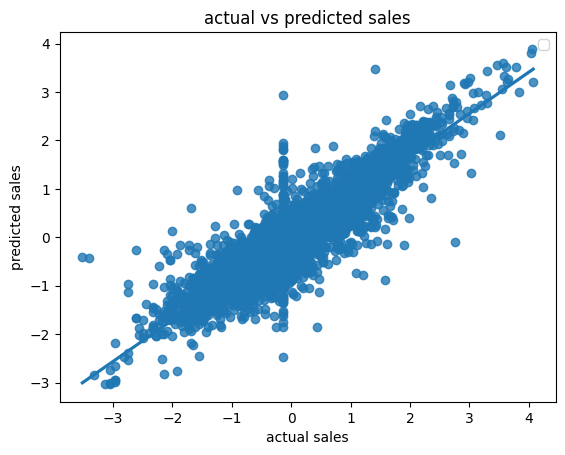

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('actual vs predicted sales')
plt.legend()
plt.show()